In [9]:
import numpy as np
from pypde import *
import matplotlib.pyplot as plt
from pypde.bases.utils import zero_pad

N = 10
xbase = Base(N,"CN",dealias=3/2)
T = Field([xbase,xbase])
xbase = Base(N,"CD",dealias=3/2)
U = Field([xbase,xbase])

xbase = Base(N,"CH",dealias=3/2)
NL = Field([xbase,xbase])

xx,yy = np.meshgrid(T.x,T.y,indexing="ij")
xx2,yy2 = np.meshgrid(T.dealias.x,T.dealias.y,indexing="ij")

## Dealiasing

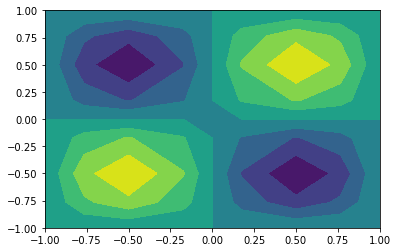

In [14]:
T.v = np.cos(np.pi*xx)*np.cos(np.pi*yy)
U.v = np.sin(np.pi*xx)*np.sin(np.pi*yy)
T.forward()
U.forward()

plt.contourf(xx,yy,U.v)

In [15]:
#NL.forward(T.v*U.v)

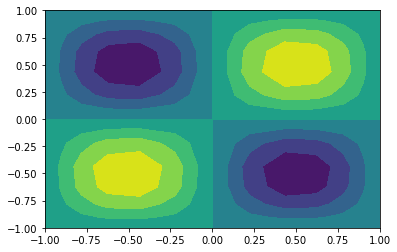

In [17]:
# Explicit

u_padded = zero_pad(U.vhat, U.dealias.xs[0].M,axis=0)
t_padded = zero_pad(T.vhat, T.dealias.xs[0].M,axis=0)

u_padded = zero_pad(u_padded, U.dealias.xs[1].M,axis=1)
t_padded = zero_pad(t_padded, T.dealias.xs[1].M,axis=1)
u = U.dealias.backward(u_padded)
t = T.dealias.backward(t_padded)


plt.contourf(xx2,yy2,u)
plt.show()


p = u*t
p_hat = NL.dealias.forward(p)

#p_hat

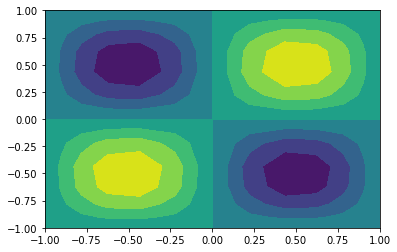

In [18]:
# Use dealiased space

u = U.dealias.backward(U.vhat)
plt.contourf(xx2,yy2,u)
plt.show()
t = T.dealias.backward(T.vhat)
p = u*t
p_hat = NL.dealias.forward(p)

#p_hat